In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
from mpmath_integration import quad_phi

In [3]:
instance = '../code/tests/results/test_general_small.csv'

In [4]:
df = pd.read_csv(instance)

In [5]:
df.head()

,x,alpha,beta,mu,delta,mpmath,scipy,gnp
0,0.118216,0.209108,0.030134,3.722877,1.801323,0.060465,0.060465,-1.0
1,4.504637,3.667039,-3.434034,-0.147107,2.335966,1.000000,1.000000,-1.0
2,-3.558404,0.450252,-0.319093,2.752972,2.218896,0.103112,0.103112,-1.0
3,4.486494,0.545200,0.353340,-0.041184,1.572132,0.913257,0.913257,-1.0
4,-1.881685,3.186210,-1.030812,-4.584931,0.460011,0.999999,0.999999,-1.0


In [6]:
df.loc[df['scipy'] == 'NAN', 'scipy'] = np.NaN
df['scipy'] = df['scipy'].astype(float)

df.loc[df['gnp'] == 'NAN', 'gnp'] = np.NaN
df['gnp'] = df['gnp'].astype(float)

In [7]:
df['relerr_gnp'] = np.absolute(df['gnp'] / df['mpmath'] - 1)
df['abs_gnp'] = np.absolute(df['gnp'] - df['mpmath'])

In [8]:
df['relerr_scipy'] = np.absolute(df['scipy'] / df['mpmath'] - 1)
df['abs_scipy'] = np.absolute(df['scipy'] - df['mpmath'])

In [9]:
df.describe()

,x,alpha,beta,mu,delta,mpmath,scipy,gnp,relerr_gnp,abs_gnp,relerr_scipy,abs_scipy
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03,5.000000e+03,5000.000000,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03
mean,-0.025352,2.533611,-0.034799,-0.029142,2.492489,5.007353e-01,5.007353e-01,-0.272823,1.352174e+36,7.735584e-01,1.888488e-05,7.569341e-13
std,2.889619,1.451462,1.681183,2.910092,1.420696,4.353408e-01,4.353408e-01,0.795711,9.561314e+37,8.256017e-01,1.197020e-03,2.318885e-11
min,-4.999040,0.001562,-4.953604,-4.999842,0.002673,1.479100e-40,1.479100e-40,-1.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,-2.499877,1.261606,-0.994493,-2.548120,1.290809,9.587406e-03,9.587406e-03,-1.000000,3.219647e-15,1.210688e-15,4.440892e-16,8.989052e-17
50%,-0.036527,2.560397,-0.018630,-0.035475,2.499332,4.927365e-01,4.927365e-01,-1.000000,2.000000e+00,1.000000e+00,1.776357e-15,4.302114e-16
75%,2.508378,3.787534,0.902873,2.516573,3.718896,9.935991e-01,9.935991e-01,0.445296,3.548482e+00,1.688968e+00,1.171285e-13,1.776357e-15
max,4.997911,4.999279,4.799063,4.997239,4.999505,1.000000e+00,1.000000e+00,1.000000,6.760870e+39,2.000000e+00,8.454635e-02,1.433365e-09


In [10]:
mask_inf = df['relerr_gnp'] == np.inf
mask_nan = (df['relerr_gnp'].isna() & (df['mpmath'] != df['gnp']) & (df['mpmath'] != 0))

mask_err = df['relerr_gnp'] > 5e-13

In [11]:
mask_inf.sum(), mask_nan.sum()

(0, 0)

In [12]:
df[mask_inf]

,x,alpha,beta,mu,delta,mpmath,scipy,gnp,relerr_gnp,abs_gnp,relerr_scipy,abs_scipy


In [13]:
mask_err.sum(), (df['relerr_gnp'] > 1e-13).sum()

(3010, 3137)

In [14]:
df[mask_err].sort_values('relerr_gnp', ascending=False).head(30)

,x,alpha,beta,mu,delta,mpmath,scipy,gnp,relerr_gnp,abs_gnp,relerr_scipy,abs_scipy
1514,-4.910506,4.863085,3.929774,4.599634,0.073555,1.479100e-40,1.479100e-40,-1.0,6.760870e+39,1.0,3.884129e-07,5.745013e-47
3144,-3.275460,4.792150,4.352360,4.688423,4.896895,9.980064e-33,9.980064e-33,-1.0,1.001998e+32,1.0,1.887379e-14,1.874784e-46
2223,-4.830304,4.702137,3.554025,3.619462,0.944341,2.852683e-32,2.852683e-32,-1.0,3.505472e+31,1.0,4.809558e-10,1.372015e-41
2458,-4.113847,3.525297,3.491394,4.751224,2.111979,9.276552e-30,9.276552e-30,-1.0,1.077987e+29,1.0,3.638778e-11,3.375532e-40
2341,-4.105889,4.861496,3.459953,3.524601,1.113063,4.374820e-29,4.374820e-29,-1.0,2.285808e+28,1.0,2.894462e-10,1.266275e-38
3370,-4.221156,4.139319,3.444787,3.761810,0.602431,5.189975e-29,5.189975e-29,-1.0,1.926792e+28,1.0,7.923782e-09,4.112423e-37
2986,-4.858714,3.609983,3.390551,3.671269,0.736290,8.147972e-29,8.147971e-29,-1.0,1.227299e+28,1.0,1.621465e-09,1.321165e-37
1574,-4.928124,4.147772,2.961161,3.674164,0.969478,1.586794e-28,1.586794e-28,-1.0,6.302014e+27,1.0,8.529502e-10,1.353456e-37
3059,-3.469069,4.218491,3.928259,3.969244,1.434040,1.690380e-28,1.690380e-28,-1.0,5.915828e+27,1.0,2.337126e-10,3.950633e-38
3512,-3.915891,4.546035,3.111772,2.912822,0.002673,3.216443e-28,3.222218e-28,-1.0,3.109024e+27,1.0,1.795439e-03,5.774929e-31


In [15]:
df[~mask_err].sort_values('relerr_gnp', ascending=False).head(20)

,x,alpha,beta,mu,delta,mpmath,scipy,gnp,relerr_gnp,abs_gnp,relerr_scipy,abs_scipy
171,-1.402131,1.213707,0.789903,0.771087,3.115233,0.003452,0.003452,0.003452,4.940492e-13,1.705667e-15,2.680078e-13,9.250413e-16
2609,-1.638197,1.180172,0.281251,1.611125,2.442470,0.004831,0.004831,0.004831,4.862777e-13,2.349683e-15,1.310063e-14,6.331741e-17
877,-0.314770,4.702091,-1.202226,3.149399,3.114679,0.002840,0.002840,0.002840,4.747314e-13,1.347880e-15,3.397282e-14,9.671083e-17
2062,-1.846154,2.190902,-0.087697,0.840715,2.229987,0.008325,0.008325,0.008325,4.660716e-13,3.880576e-15,3.552714e-15,2.949030e-17
3922,0.891631,3.072135,-2.609089,3.087251,1.479620,0.445010,0.445010,0.445010,4.647394e-13,2.068345e-13,1.400879e-12,6.233902e-13
2142,-0.606895,3.652387,2.748111,-1.830913,4.467164,0.010276,0.010276,0.010276,4.609646e-13,4.737530e-15,1.798561e-14,1.856154e-16
2477,-3.237488,1.184319,-0.724176,3.905635,4.845222,0.115921,0.115921,0.115921,4.414247e-13,5.118128e-14,1.221245e-15,1.387779e-16
1750,-3.225803,1.090788,0.679958,-0.624449,4.804804,0.003072,0.003072,0.003072,4.407585e-13,1.353952e-15,1.143530e-14,3.512815e-17
626,-3.004237,3.694774,2.886262,-4.788638,3.584478,0.057407,0.057407,0.057407,4.291012e-13,2.463307e-14,6.661338e-16,3.469447e-17
4791,1.546832,0.877814,0.184230,4.861578,2.218318,0.010072,0.010072,0.010072,4.287681e-13,4.317727e-15,4.773959e-14,4.805184e-16


In [16]:
df[~mask_err].describe()

,x,alpha,beta,mu,delta,mpmath,scipy,gnp,relerr_gnp,abs_gnp,relerr_scipy,abs_scipy
count,1990.000000,1990.000000,1990.000000,1990.000000,1990.000000,1990.000000,1990.000000,1990.000000,1.990000e+03,1.990000e+03,1.990000e+03,1.990000e+03
mean,0.123066,2.278694,-0.228878,-0.259921,3.036747,0.571784,0.571784,0.571784,2.148097e-14,3.828720e-15,4.058142e-13,2.619277e-13
std,2.668975,1.429187,1.207912,2.680333,1.237547,0.370537,0.370537,0.370537,6.312360e-14,1.716786e-14,9.917905e-12,9.120719e-12
min,-4.971127,0.001562,-4.164746,-4.999793,0.151837,0.000701,0.000701,0.000701,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,-2.031809,0.998400,-0.878555,-2.486685,2.097198,0.189178,0.189178,0.189178,4.440892e-16,2.220446e-16,3.330669e-16,1.110223e-16
50%,0.166977,2.217302,-0.106602,-0.360371,3.153330,0.633409,0.633409,0.633409,1.776357e-15,7.771561e-16,7.771561e-16,3.330669e-16
75%,2.341870,3.468204,0.401595,1.872193,4.094176,0.961890,0.961890,0.961890,5.856426e-15,2.195293e-15,3.996803e-15,1.110223e-15
max,4.994109,4.999279,3.577168,4.995853,4.999505,1.000000,1.000000,1.000000,4.940492e-13,2.602363e-13,4.221921e-10,4.049947e-10


In [17]:
df[mask_err].describe()

,x,alpha,beta,mu,delta,mpmath,scipy,gnp,relerr_gnp,abs_gnp,relerr_scipy,abs_scipy
count,3010.000000,3010.000000,3010.000000,3010.000000,3010.000000,3.010000e+03,3.010000e+03,3010.000000,3.010000e+03,3.010000e+03,3.010000e+03,3.010000e+03
mean,-0.123475,2.702144,0.093513,0.123434,2.132664,4.537626e-01,4.537626e-01,-0.831218,2.246136e+36,1.284981e+00,3.137023e-05,1.084197e-12
std,3.023110,1.441688,1.920875,3.043350,1.419665,4.675038e-01,4.675038e-01,0.421245,1.232308e+38,6.892166e-01,1.542752e-03,2.894975e-11
min,-4.999040,0.001792,-4.953604,-4.999842,0.002673,1.479100e-40,1.479100e-40,-1.000000,5.202505e-13,1.593650e-17,0.000000e+00,0.000000e+00
25%,-2.824984,1.485505,-1.105500,-2.610934,0.886953,9.001250e-05,9.001250e-05,-1.000000,2.000000e+00,1.000000e+00,6.661338e-16,6.873842e-17
50%,-0.253678,2.807436,0.063170,0.253928,1.937396,1.654999e-01,1.654999e-01,-1.000000,2.036850e+00,1.057594e+00,7.993606e-15,4.440892e-16
75%,2.639392,3.939864,1.325167,2.848437,3.324986,9.992894e-01,9.992894e-01,-1.000000,6.780859e+02,1.999255e+00,1.910078e-11,2.553513e-15
max,4.997911,4.996301,4.799063,4.997239,4.998548,1.000000e+00,1.000000e+00,0.999656,6.760870e+39,2.000000e+00,8.454635e-02,1.433365e-09


In [18]:
df_err = df[mask_err].sort_values('relerr_gnp', ascending=False).copy()

In [19]:
df_err = df_err.reset_index(drop=True)

In [20]:
df_err.head()

,x,alpha,beta,mu,delta,mpmath,scipy,gnp,relerr_gnp,abs_gnp,relerr_scipy,abs_scipy
0,-4.910506,4.863085,3.929774,4.599634,0.073555,1.479100e-40,1.479100e-40,-1.0,6.760870e+39,1.0,3.884129e-07,5.745013e-47
1,-3.275460,4.792150,4.352360,4.688423,4.896895,9.980064e-33,9.980064e-33,-1.0,1.001998e+32,1.0,1.887379e-14,1.874784e-46
2,-4.830304,4.702137,3.554025,3.619462,0.944341,2.852683e-32,2.852683e-32,-1.0,3.505472e+31,1.0,4.809558e-10,1.372015e-41
3,-4.113847,3.525297,3.491394,4.751224,2.111979,9.276552e-30,9.276552e-30,-1.0,1.077987e+29,1.0,3.638778e-11,3.375532e-40
4,-4.105889,4.861496,3.459953,3.524601,1.113063,4.374820e-29,4.374820e-29,-1.0,2.285808e+28,1.0,2.894462e-10,1.266275e-38


In [21]:
idx = 0
df_err.iloc[idx].mpmath, df_err.iloc[idx].gnp

(1.4790995781919311e-40, -1.0)

In [22]:
x, alpha, beta, mu, delta = df_err.iloc[idx][['x', 'alpha', 'beta', 'mu', 'delta']]
x, alpha, beta, mu, delta

(-4.910506463577898,
 4.863085028347056,
 3.929774441953649,
 4.59963413561251,
 0.073555358758633)

In [ ]:
mp_result = quad_phi(x, alpha, beta, mu, delta, digits=300)
mp_result

#### 1. Decision tree (test for more complex cases)

In [23]:
from sklearn import tree

In [24]:
df['target'] = (~mask_err).astype(int)

In [25]:
df.head()

,x,alpha,beta,mu,delta,mpmath,scipy,gnp,relerr_gnp,abs_gnp,relerr_scipy,abs_scipy,target
0,0.118216,0.209108,0.030134,3.722877,1.801323,0.060465,0.060465,-1.0,17.538415,1.060465,8.881784e-16,4.857226e-17,0
1,4.504637,3.667039,-3.434034,-0.147107,2.335966,1.000000,1.000000,-1.0,2.000000,2.000000,7.549517e-15,7.549517e-15,0
2,-3.558404,0.450252,-0.319093,2.752972,2.218896,0.103112,0.103112,-1.0,10.698203,1.103112,1.998401e-15,2.081668e-16,0
3,4.486494,0.545200,0.353340,-0.041184,1.572132,0.913257,0.913257,-1.0,2.094983,1.913257,7.771561e-16,6.661338e-16,0
4,-1.881685,3.186210,-1.030812,-4.584931,0.460011,0.999999,0.999999,-1.0,2.000001,1.999999,1.110223e-16,1.110223e-16,0


In [26]:
df['target'].describe()

count    5000.000000
mean        0.398000
std         0.489534
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: target, dtype: float64

In [27]:
df.describe()

,x,alpha,beta,mu,delta,mpmath,scipy,gnp,relerr_gnp,abs_gnp,relerr_scipy,abs_scipy,target
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03,5.000000e+03,5000.000000,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03,5000.000000
mean,-0.025352,2.533611,-0.034799,-0.029142,2.492489,5.007353e-01,5.007353e-01,-0.272823,1.352174e+36,7.735584e-01,1.888488e-05,7.569341e-13,0.398000
std,2.889619,1.451462,1.681183,2.910092,1.420696,4.353408e-01,4.353408e-01,0.795711,9.561314e+37,8.256017e-01,1.197020e-03,2.318885e-11,0.489534
min,-4.999040,0.001562,-4.953604,-4.999842,0.002673,1.479100e-40,1.479100e-40,-1.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
25%,-2.499877,1.261606,-0.994493,-2.548120,1.290809,9.587406e-03,9.587406e-03,-1.000000,3.219647e-15,1.210688e-15,4.440892e-16,8.989052e-17,0.000000
50%,-0.036527,2.560397,-0.018630,-0.035475,2.499332,4.927365e-01,4.927365e-01,-1.000000,2.000000e+00,1.000000e+00,1.776357e-15,4.302114e-16,0.000000
75%,2.508378,3.787534,0.902873,2.516573,3.718896,9.935991e-01,9.935991e-01,0.445296,3.548482e+00,1.688968e+00,1.171285e-13,1.776357e-15,1.000000
max,4.997911,4.999279,4.799063,4.997239,4.999505,1.000000e+00,1.000000e+00,1.000000,6.760870e+39,2.000000e+00,8.454635e-02,1.433365e-09,1.000000


In [30]:
df['omega'] = np.sqrt(df['delta'] ** 2 + (df['x'] - df['mu']) ** 2)
df['gamma'] = np.sqrt(df['alpha'] ** 2 - df['beta'] ** 2)
df['xmu'] = df['x'] - df['mu']
df['xmu2'] = df['xmu'] ** 2
df['aw'] = df['alpha'] * df['omega']
df['aow'] = df['alpha'] / df['omega']
df['woa'] = df['omega'] / df['alpha']
df['da'] = df['delta'] * df['alpha']
df['abs_beta'] = df['beta'].abs()

In [44]:
X = df[['alpha', 'delta', 'aw', 'xmu2', 'aow', 'woa', 'da', 'omega', 'abs_beta', 'gamma']]
y = df['target']

In [50]:
clf = tree.DecisionTreeClassifier(max_depth=4)
clf = clf.fit(X, y)

In [51]:
clf.score(X, y)

0.8628

[Text(0.5267857142857143, 0.9, 'xmu2 <= 6.062\ngini = 0.479\nsamples = 5000\nvalue = [3010, 1990]'),
 Text(0.2857142857142857, 0.7, 'delta <= 0.848\ngini = 0.434\nsamples = 2121\nvalue = [674.0, 1447.0]'),
 Text(0.40625, 0.8, 'True  '),
 Text(0.14285714285714285, 0.5, 'xmu2 <= 1.093\ngini = 0.386\nsamples = 345\nvalue = [255.0, 90.0]'),
 Text(0.07142857142857142, 0.3, 'delta <= 0.393\ngini = 0.496\nsamples = 161\nvalue = [73, 88]'),
 Text(0.03571428571428571, 0.1, 'gini = 0.378\nsamples = 75\nvalue = [56, 19]'),
 Text(0.10714285714285714, 0.1, 'gini = 0.317\nsamples = 86\nvalue = [17, 69]'),
 Text(0.21428571428571427, 0.3, 'aw <= 0.05\ngini = 0.022\nsamples = 184\nvalue = [182, 2]'),
 Text(0.17857142857142858, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.25, 0.1, 'gini = 0.011\nsamples = 183\nvalue = [182, 1]'),
 Text(0.42857142857142855, 0.5, 'abs_beta <= 1.699\ngini = 0.361\nsamples = 1776\nvalue = [419, 1357]'),
 Text(0.35714285714285715, 0.3, 'xmu2 <= 2.313\ngini = 0.21

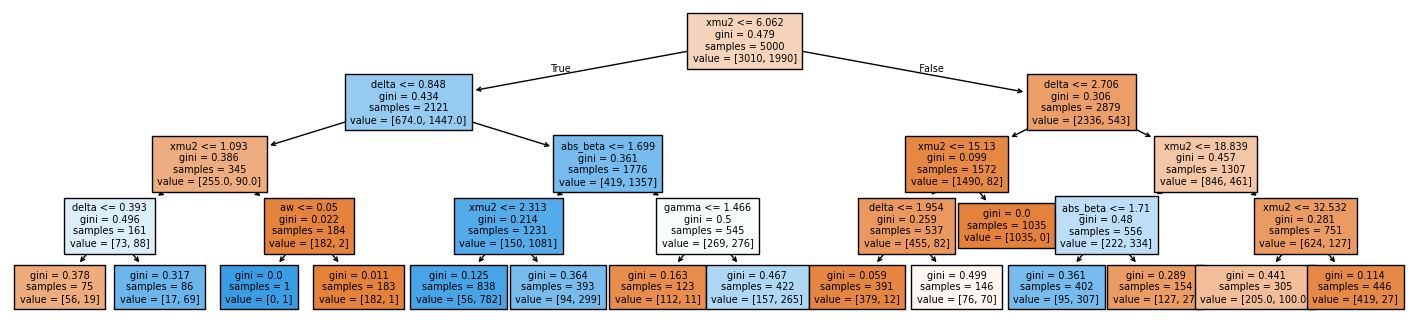

In [55]:
fig = plt.figure(figsize=(18, 4))
tree.plot_tree(clf, feature_names=X.columns, filled=True, fontsize=7)

In [112]:
mask_series = (df['xmu2'] <= 3.0) & (df['delta'] >= 1.0) & (df['abs_beta'] <= 1.5) & (df['gamma'] >= 0.75)
df[mask_series].describe()

,x,alpha,beta,mu,delta,mpmath,scipy,gnp,relerr_gnp,abs_gnp,...,target,omega,xmu,xmu2,aw,aow,woa,da,abs_beta,gamma
count,577.000000,577.000000,577.000000,577.000000,577.000000,577.000000,577.000000,577.000000,5.770000e+02,5.770000e+02,...,577.000000,577.000000,577.000000,577.000000,577.000000,577.000000,577.000000,577.000000,577.000000,577.000000
mean,-0.112788,2.598795,-0.052982,-0.085366,2.960806,0.499529,0.499529,0.499529,3.174103e-14,5.211936e-16,...,0.986135,3.132514,-0.027422,0.930311,8.130938,0.962445,1.526954,7.687750,0.674545,2.457032
std,2.747022,1.166118,0.794860,2.709061,1.132487,0.344640,0.344640,0.344640,2.048000e-13,7.010997e-16,...,0.117031,1.079985,0.964973,0.888562,4.806141,0.635372,1.005387,4.752817,0.422864,1.201328
min,-4.933437,0.759437,-1.484226,-4.953037,1.001073,0.000623,0.000623,0.000623,0.000000e+00,0.000000e+00,...,0.000000,1.031791,-1.722908,0.000002,1.112037,0.167980,0.227023,1.102463,0.000268,0.750399
25%,-2.544477,1.635541,-0.686120,-2.421062,2.023294,0.164889,0.164889,0.164889,2.220446e-16,1.110223e-16,...,1.000000,2.236123,-0.870082,0.130411,4.482867,0.516548,0.830661,4.076994,0.323882,1.446594
50%,-0.226515,2.406086,-0.053273,-0.070241,2.947234,0.467578,0.467578,0.467578,5.551115e-16,2.775558e-16,...,1.000000,3.121681,-0.026436,0.617757,6.961774,0.827891,1.207888,6.460213,0.615490,2.249421
75%,2.196066,3.504120,0.550551,2.153149,3.924835,0.843863,0.843863,0.843863,2.442491e-15,6.106227e-16,...,1.000000,4.041660,0.751740,1.632895,10.831542,1.203860,1.935927,10.301590,1.017917,3.375814
max,4.994109,4.999279,1.497151,4.984399,4.995140,0.999323,0.999323,0.999323,2.680967e-12,4.390151e-15,...,1.000000,5.212483,1.731972,2.999727,24.471118,4.404848,5.953091,24.458969,1.497151,4.976796


In [106]:
cols = ['x', 'alpha', 'beta', 'mu', 'delta', 'gamma', 'scipy', 'gnp',
       'relerr_gnp', 'abs_gnp', 'relerr_scipy', 'abs_scipy']

df.loc[mask_series, cols].sort_values('relerr_gnp', ascending=False).head(20)

,x,alpha,beta,mu,delta,gamma,scipy,gnp,relerr_gnp,abs_gnp,relerr_scipy,abs_scipy
1346,-4.089459,1.676240,1.160785,-2.396097,1.321755,1.209280,0.001451,0.001451,2.680967e-12,3.890334e-15,4.879097e-12,7.080274e-15
4976,-2.914151,2.028240,1.435828,-1.196112,2.321750,1.432534,0.000623,0.000623,2.034817e-12,1.266673e-15,5.595524e-14,3.480289e-17
1067,-4.660902,3.276715,0.559309,-3.170801,1.009830,3.228628,0.002460,0.002460,1.784795e-12,4.390151e-15,5.573431e-12,1.370995e-14
425,0.134678,1.593858,1.184377,1.763517,3.208746,1.066598,0.001607,0.001607,1.730394e-12,2.781412e-15,3.552714e-14,5.702903e-17
3178,-4.554097,2.498611,1.071277,-2.914333,1.377243,2.257304,0.001498,0.001498,1.510347e-12,2.262079e-15,6.143974e-13,9.202708e-16
1275,-1.624167,4.563434,1.124775,-0.300407,1.321176,4.422648,0.001370,0.001370,1.470157e-12,2.014881e-15,2.531308e-14,3.469447e-17
4127,-4.739917,1.487834,1.132033,-3.142323,2.826864,0.965480,0.002253,0.002253,1.293410e-12,2.914335e-15,3.930190e-14,8.847090e-17
3929,-2.597809,4.491933,0.794021,-1.034070,1.883830,4.421198,0.002013,0.002013,6.767920e-13,1.362625e-15,7.882583e-14,1.587272e-16
3208,2.439735,3.417155,1.497151,3.453552,4.886690,3.071724,0.003748,0.003748,3.019807e-13,1.131907e-15,1.187939e-14,4.466913e-17
1950,3.203068,2.081844,1.097429,4.243032,1.046038,1.769102,0.010245,0.010245,2.766676e-13,2.834538e-15,7.327472e-15,7.459311e-17
